In [41]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

# Prepare Data for all Cities for Plotting

In [204]:

# Function to process data for a given city
def process_city_data(city_name):
    current_dir = os.getcwd()
    base_path = os.path.join(current_dir, city_name)

    def read_and_process_csv(filename_pattern):
        files = [os.path.join(base_path, f) for f in os.listdir(base_path) if f.startswith(filename_pattern)]
        dfs = []
        for file in files:
            df = pd.read_csv(file)
            # Ensure the 'date' column is in datetime format
            df['date'] = pd.to_datetime(df['date'])
            dfs.append(df)
        # Concatenate all data frames ensuring the 'date' column is set as the index
        df = pd.concat(dfs).set_index('date')

        column_name = f'Throughput_{city_name.capitalize()}'

        monthly_data = df.resample('M').agg({'MeanThroughputMbps': 'mean'}).rename(columns={"MeanThroughputMbps": column_name})

        # Ensure the comparison is done correctly by converting the string to a Timestamp
        comparison_date = pd.to_datetime('2019-01-01')
        monthly_data = monthly_data[monthly_data.index >= comparison_date]

        monthly_data['month'] = monthly_data.index.month
        monthly_data['year'] = monthly_data.index.year

        data_by_year = dict(tuple(monthly_data.groupby('year')))
        return data_by_year

    # Process download data
    city_downloads = read_and_process_csv(f'{city_name}_download_')
    
    # Process upload data
    city_uploads = read_and_process_csv(f'{city_name}_upload_')

    return city_downloads, city_uploads

cities = ['riyadh', 'dubai', 'kuwaitcity', 'doha', 'muscat', 'manama']
city_data = {}

for city in cities:
    city_downloads, city_uploads = process_city_data(city)
    
    # Store the combined DataFrame in the city_data dictionary
    city_data[city] = {
        'downloads': pd.concat(city_downloads.values(), axis=0),
        'uploads': pd.concat(city_uploads.values(), axis=0)
    }
    
    # Now, create separate variables for each city's downloads and uploads
    globals()[f"{city}_downloads"] = city_data[city]['downloads']
    globals()[f"{city}_uploads"] = city_data[city]['uploads']

## Plot Internet Speed of All Cities - Year by Year

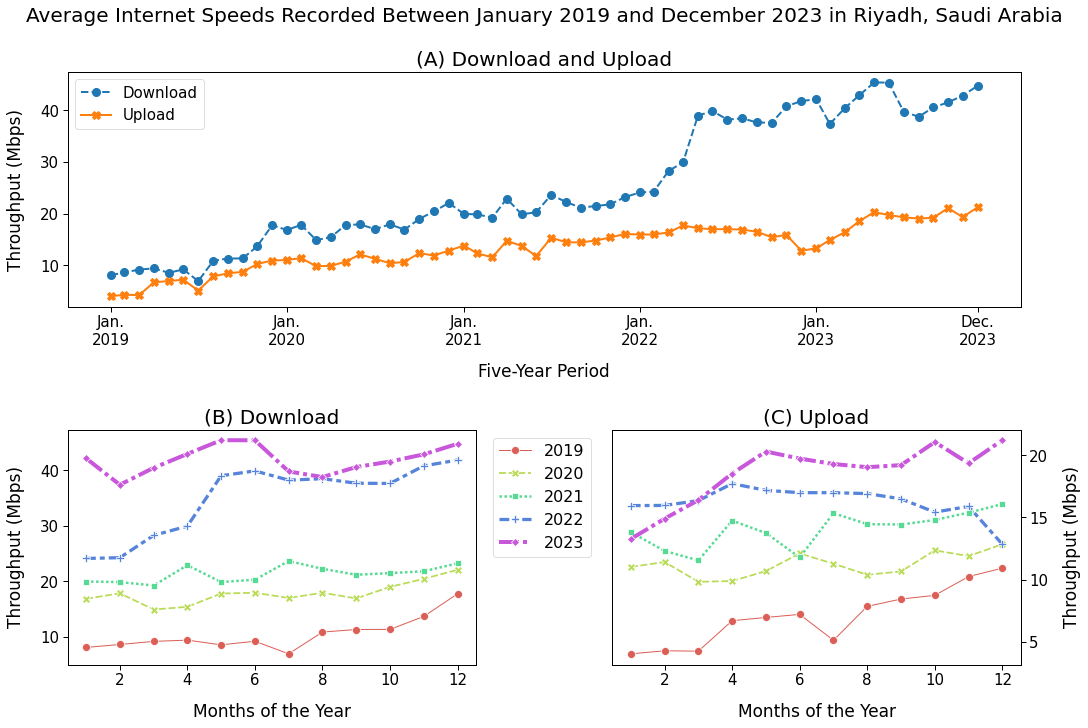

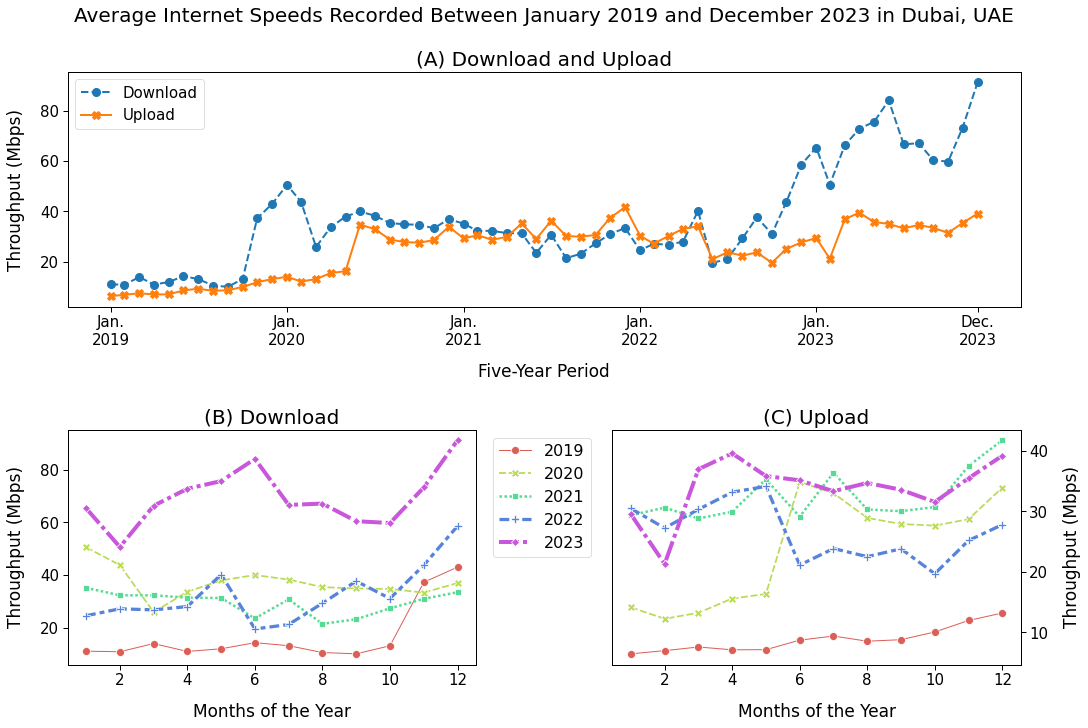

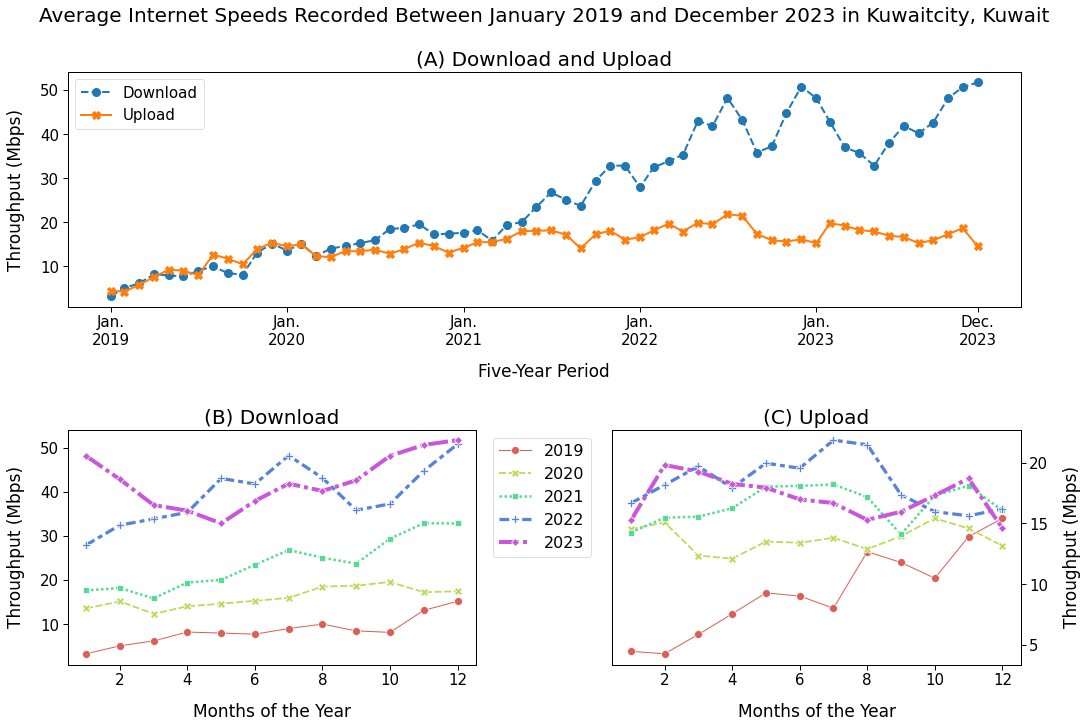

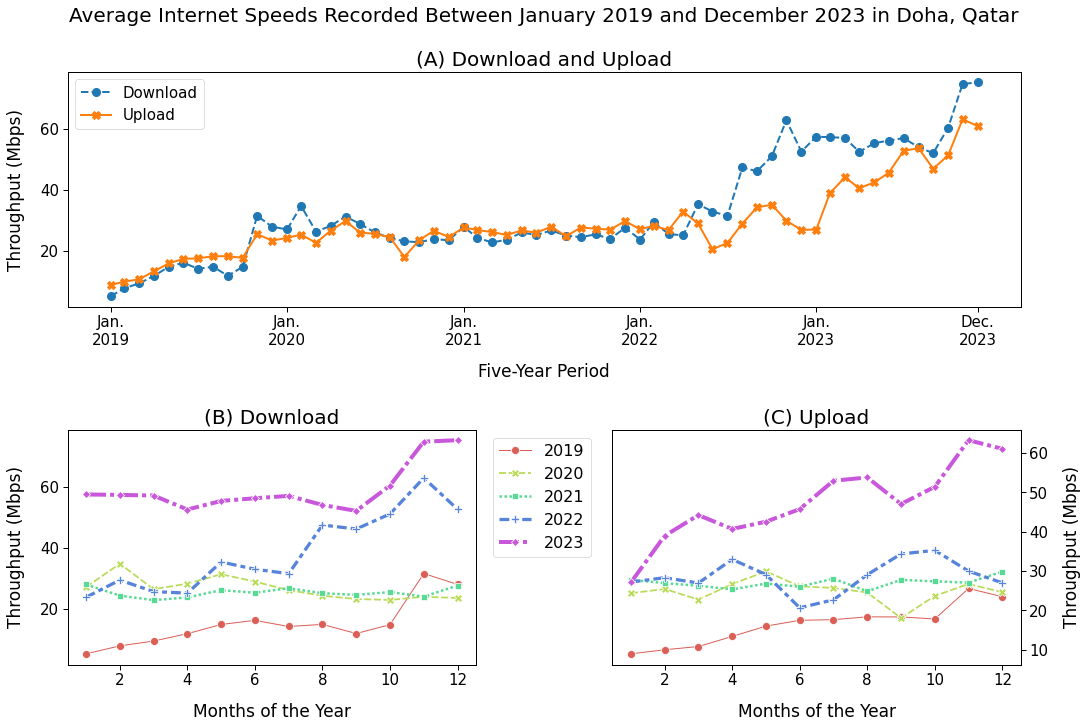

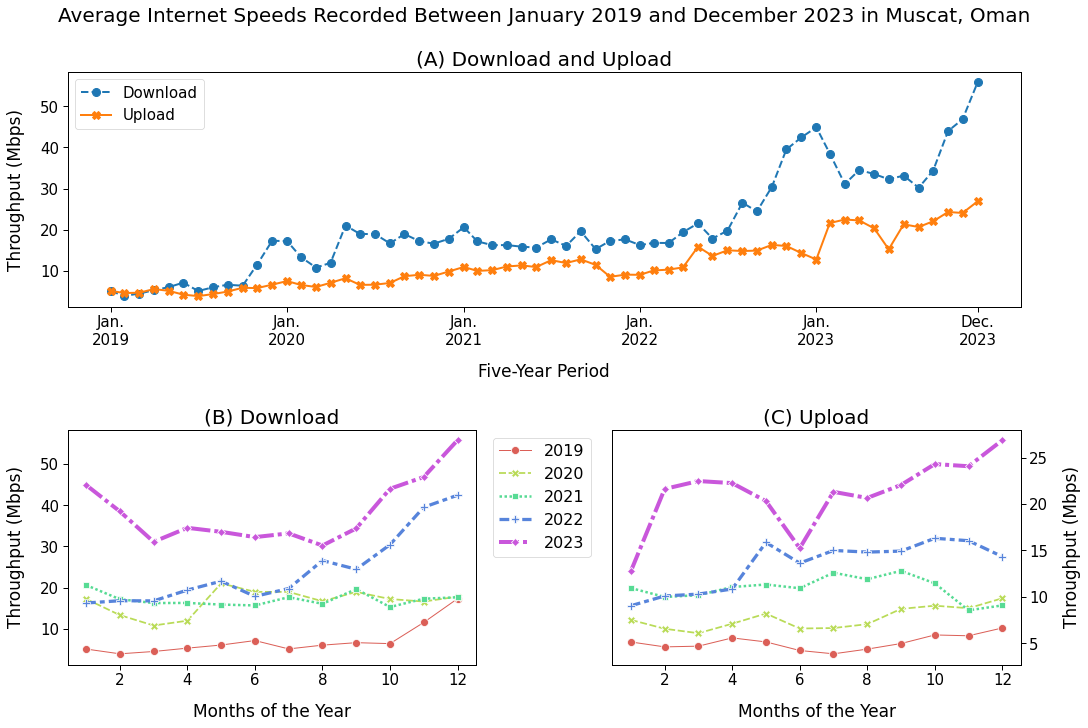

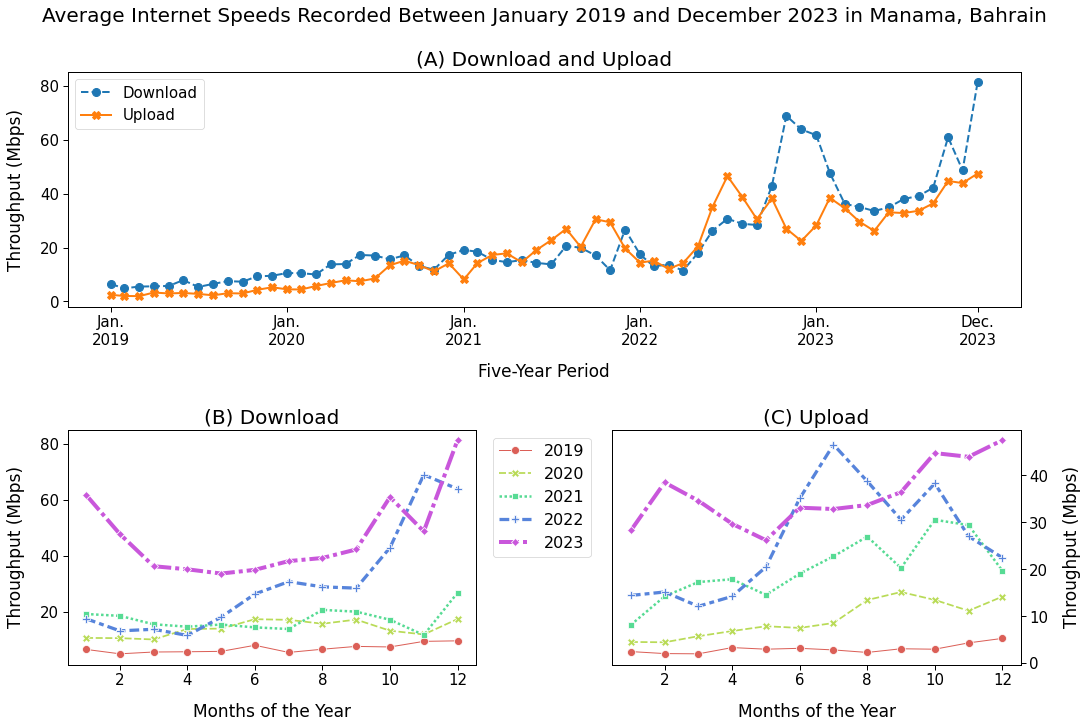

In [224]:
# Initial declarations
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)
palette = sb.color_palette("hls", 2)
palette2 = sb.color_palette("hls", 5)
paper_rc = {'lines.linewidth': 2, 'lines.markersize': 8}                  
sb.set_context("paper", rc = paper_rc)

def plot_throughput(downloads, uploads, city_name, country_name, throughput_column):
    fig = plt.figure(constrained_layout=True)
    gs = fig.add_gridspec(nrows=2, ncols=2)
    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1, 0])
    ax3 = fig.add_subplot(gs[1, 1])

    # Five-Year Data
    ax1.plot(downloads[throughput_column], linestyle='--', marker='o', label='Download')
    ax1.plot(uploads[throughput_column], marker='X', label='Upload')
    ax1.set_title(f"Average Internet Speeds Recorded Between January 2019 and December 2023 in {city_name}, {country_name}\n\n(A) Download and Upload", fontdict={'fontsize': 20})
    ax1.set_xticks(['2019-01-31', '2020-01-31', '2021-01-31', '2022-01-31', '2023-01-31', '2023-12-31'])
    ax1.set_xticklabels(['Jan.\n2019', 'Jan.\n2020', 'Jan.\n2021', 'Jan.\n2022', 'Jan.\n2023', 'Dec.\n2023'])
    ax1.tick_params(axis = 'both', which = 'both', labelsize = 15)

    ax1.set_xlabel('Five-Year Period\n', fontdict={'fontsize': 17}, labelpad = 15)
    ax1.set_ylabel('Throughput (Mbps)', fontdict={'fontsize': 17}, labelpad = 15)
    ax1.legend(prop={'size': 15})

    # Year-by-Year plots for downloads and uploads with ax2 and ax3 respectively
    sb.lineplot(x='month', y=throughput_column, data=downloads, hue='year', style='year', markers=True, palette=palette2, size='year', legend=False, ax=ax2)  # for download
    sb.lineplot(x='month', y=throughput_column, data=uploads, hue='year', style='year', markers=True, palette=palette2, size='year', legend=False, ax=ax3)  # for upload
    ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)
    ax2.set_xlabel('Months of the Year', fontdict={'fontsize': 17}, labelpad = 15)
    ax2.set_ylabel('Throughput (Mbps)', fontdict={'fontsize': 17}, labelpad = 15)
    ax2.set_title('(B) Download', fontdict={'fontsize': 20})

    ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)
    ax3.set_xlabel('Months of the Year', fontdict={'fontsize': 17}, labelpad = 15)
    ax3.set_ylabel('Throughput (Mbps)', fontdict={'fontsize': 17}, labelpad = 15)
    ax3.set_title('(C) Upload', fontdict={'fontsize': 20})
    ax3.yaxis.tick_right()
    ax3.yaxis.set_label_position('right')


    ax2.legend(labels=['2019', '2020','2021','2022', '2023'], prop={'size': 16}, bbox_to_anchor=(1.3, 1))

    plt.savefig(f'figures/{city_name.lower()}thru.pdf')

# Call the function for each city with the appropriate datasets and column names
plot_throughput(riyadh_downloads, riyadh_uploads, 'Riyadh', 'Saudi Arabia', 'Throughput_Riyadh')
plot_throughput(dubai_downloads, dubai_uploads, 'Dubai', 'UAE', 'Throughput_Dubai')
plot_throughput(kuwaitcity_downloads, kuwaitcity_uploads, 'Kuwaitcity', 'Kuwait', 'Throughput_Kuwaitcity')
plot_throughput(doha_downloads, doha_uploads, 'Doha', 'Qatar', 'Throughput_Doha')
plot_throughput(muscat_downloads, muscat_uploads, 'Muscat', 'Oman', 'Throughput_Muscat')
plot_throughput(manama_downloads, manama_uploads, 'Manama', 'Bahrain', 'Throughput_Manama')


## Plot Internet Speed of All Cities - Five Years

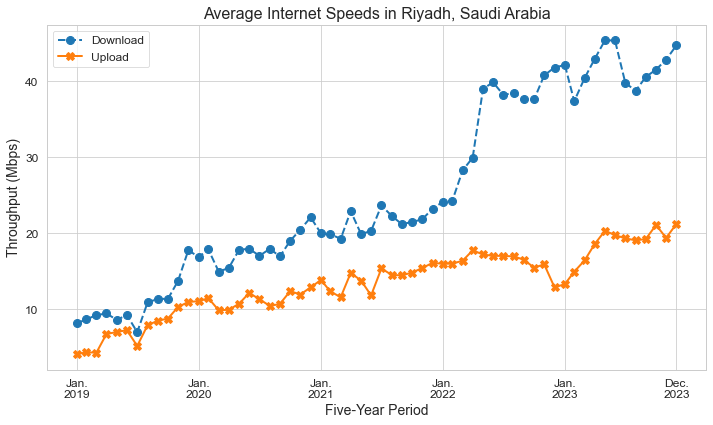

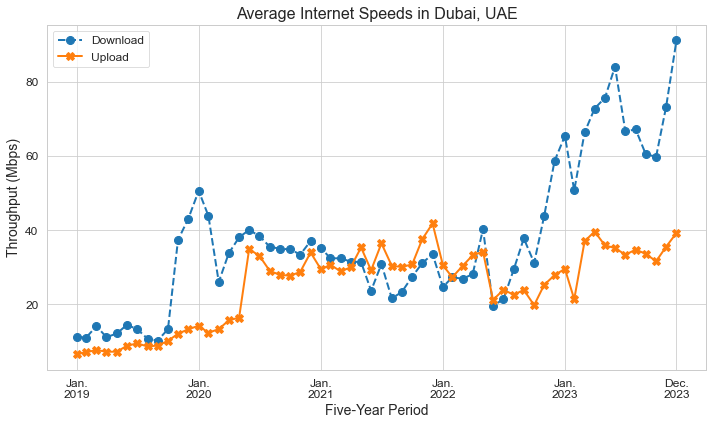

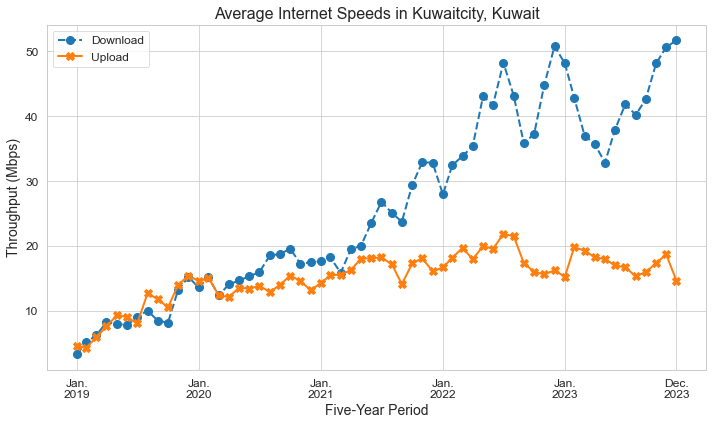

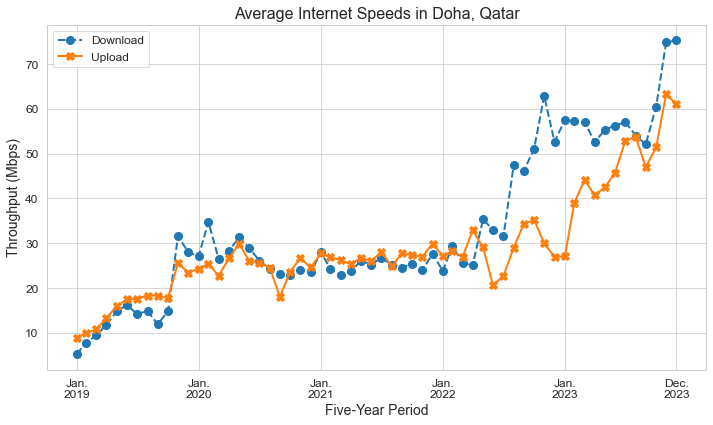

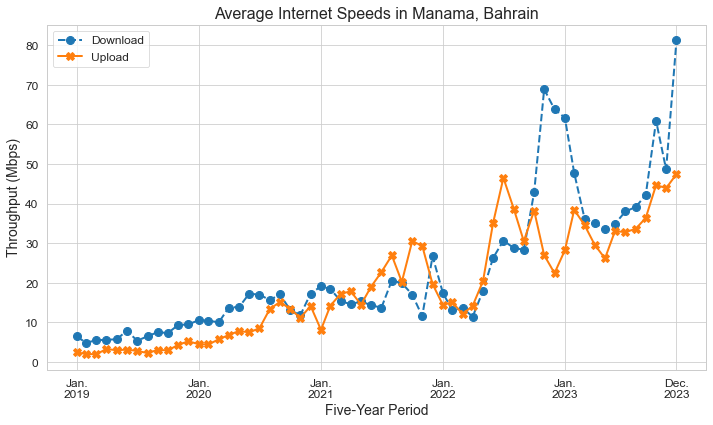

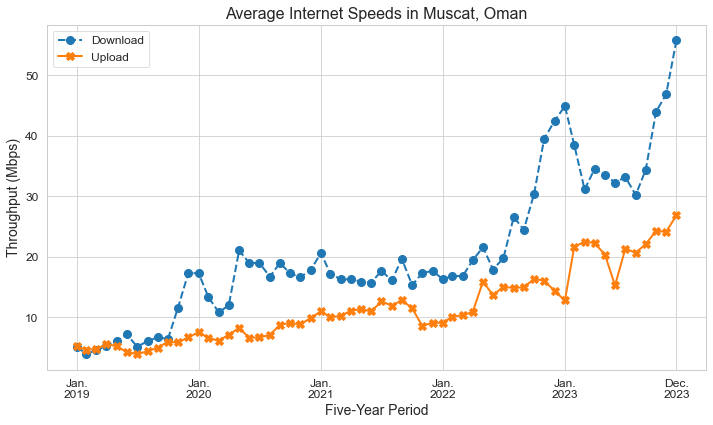

In [ ]:

# Initial declarations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

# Set the Seaborn style to "white" to ensure a light background
sb.set_style("whitegrid")  # "whitegrid" adds grid lines; use "white" for no grid lines

# Reduced figure size
plt.rcParams['figure.figsize'] = (10, 6)  # Adjust the size as needed
paper_rc = {'lines.linewidth': 2, 'lines.markersize': 8}                  
sb.set_context("paper", rc = paper_rc)

def plot_throughput(downloads, uploads, city_name, country_name, throughput_column):
    plt.figure()
    ax1 = plt.subplot(111)

    # Five-Year Data
    ax1.plot(downloads[throughput_column], linestyle='--', marker='o', label='Download')
    ax1.plot(uploads[throughput_column], marker='X', label='Upload')
    ax1.set_title(f"Average Internet Speeds in {city_name}, {country_name}", fontdict={'fontsize': 16})
    ax1.set_xticks(['2019-01-31', '2020-01-31', '2021-01-31', '2022-01-31', '2023-01-31', '2023-12-31'])
    ax1.set_xticklabels(['Jan.\n2019', 'Jan.\n2020', 'Jan.\n2021', 'Jan.\n2022', 'Jan.\n2023', 'Dec.\n2023'])
    ax1.tick_params(axis='both', which='both', labelsize=12)

    ax1.set_xlabel('Five-Year Period', fontdict={'fontsize': 14})
    ax1.set_ylabel('Throughput (Mbps)', fontdict={'fontsize': 14})
    ax1.legend(prop={'size': 12})

    # Adjust layout to ensure everything fits and save the figure
    plt.tight_layout()
    plt.savefig(f'figures/{city_name.lower()}_thru_five_years.png')  # Save as .png for better quality

# Call the function for each city with the appropriate datasets and column names
plot_throughput(riyadh_downloads, riyadh_uploads, 'Riyadh', 'Saudi Arabia', 'Throughput_Riyadh')
plot_throughput(dubai_downloads, dubai_uploads, 'Dubai', 'UAE', 'Throughput_Dubai')
plot_throughput(kuwaitcity_downloads, kuwaitcity_uploads, 'Kuwaitcity', 'Kuwait', 'Throughput_Kuwaitcity')
plot_throughput(doha_downloads, doha_uploads, 'Doha', 'Qatar', 'Throughput_Doha')
plot_throughput(manama_downloads, manama_uploads, 'Manama', 'Bahrain', 'Throughput_Manama')
plot_throughput(muscat_downloads, muscat_uploads, 'Muscat', 'Oman', 'Throughput_Muscat')


## Percentage Increase in Speed

In [221]:

# Function to calculate percentage increase and filter data for a city
def process_city_data(download_data, upload_data):
    # Initialize dictionary to store average throughput and percentage increase data
    summary = {}

    # Calculate download average and percentage increase
    download_data['Perc_Increase_Download'] = None
    avg_2019_download = download_data.loc['2019-01':'2019-12', 'Throughput_' + download_data.name.capitalize()].mean()
    avg_2023_download = download_data.loc['2023-01': '2023-12', 'Throughput_' + download_data.name.capitalize()].mean()
    change_2019_to_2023_download = ((avg_2023_download - avg_2019_download) / avg_2019_download) * 100
    summary['Average_2019_Download'] = avg_2019_download
    summary['Average_2023_Download'] = avg_2023_download
    summary['Change_2019_to_2023_Download'] = change_2019_to_2023_download

    # Calculate upload average and percentage increase
    upload_data['Perc_Increase_Upload'] = None
    avg_2019_upload = upload_data.loc['2019-01':'2019-12', 'Throughput_' + upload_data.name.capitalize()].mean()
    avg_2023_upload = upload_data.loc['2023-01': '2023-12', 'Throughput_' + upload_data.name.capitalize()].mean()
    change_2019_to_2023_upload = ((avg_2023_upload - avg_2019_upload) / avg_2019_upload) * 100
    summary['Average_2019_Upload'] = avg_2019_upload
    summary['Average_2023_Upload'] = avg_2023_upload
    summary['Change_2019_to_2023_Upload'] = change_2019_to_2023_upload

    # Calculate percentage increase for each year
    years = download_data.index.year.unique()
    for year in years:
        if f'{year}-01-31' in download_data.index and f'{year}-12-31' in download_data.index:
            start_download = download_data.loc[f'{year}-01-31', 'Throughput_' + download_data.name.capitalize()]
            end_download = download_data.loc[f'{year}-12-31', 'Throughput_' + download_data.name.capitalize()]
            change_download = ((end_download - start_download) / start_download) * 100
            download_data.loc[f'{year}-12-31', 'Perc_Increase_Download'] = round(change_download)

            start_upload = upload_data.loc[f'{year}-01-31', 'Throughput_' + upload_data.name.capitalize()]
            end_upload = upload_data.loc[f'{year}-12-31', 'Throughput_' + upload_data.name.capitalize()]
            change_upload = ((end_upload - start_upload) / start_upload) * 100
            upload_data.loc[f'{year}-12-31', 'Perc_Increase_Upload'] = round(change_upload)

    # Combine download and upload data
    combined_data = download_data[['Throughput_' + download_data.name.capitalize(), 'Perc_Increase_Download']].join(
        upload_data[['Throughput_' + upload_data.name.capitalize(), 'Perc_Increase_Upload']],
        lsuffix='_Download', rsuffix='_Upload'
    )

    # Filter combined data to include only December data (and January for the first year)
    filtered_combined_data = combined_data.loc['2019-01'].append(combined_data[(combined_data.index.month == 1) | (combined_data.index.month == 12)])
    filtered_combined_data = filtered_combined_data[filtered_combined_data.index.month == 12]

    return filtered_combined_data, summary

# Dictionary of city dataframes for downloads and uploads
city_dataframes = {
    #'riyadh': (riyadh_downloads, riyadh_uploads),
   # 'dubai': (dubai_downloads, dubai_uploads),
    'kuwaitcity': (kuwaitcity_downloads, kuwaitcity_uploads),
   # 'doha': (doha_downloads, doha_uploads),
    #'manama': (manama_downloads, manama_uploads),
   # 'muscat': (muscat_downloads, muscat_uploads),
}

# Process data for each city and create DataFrames
city_perc_increase_dataframes = {}

for city_name, (download_data, upload_data) in city_dataframes.items():
    download_data.name = city_name
    upload_data.name = city_name
    filtered_combined_data, summary = process_city_data(download_data, upload_data)
    
    
    print(f"Average 2019 for downloads in {city_name.capitalize()}: {round(summary['Average_2019_Download'], 2)}")
    print(f"Average 2023 for downloads in {city_name.capitalize()}: {round(summary['Average_2023_Download'], 2)}")
    print(f"The percentage change from 2019 to 2023 for downloads in {city_name.capitalize()}: {round(summary['Change_2019_to_2023_Download'])}%")

    print(f"Average 2019 for uploads in {city_name.capitalize()}: {round(summary['Average_2019_Upload'], 2)}")
    print(f"Average 2023 for uploads in {city_name.capitalize()}: {round(summary['Average_2023_Upload'], 2)}")
    print(f"The percentage change from 2019 to 2023 for uploads in {city_name.capitalize()}: {round(summary['Change_2019_to_2023_Upload'])}%\n")
    
    # Assign the filtered data to a new DataFrame with a specific name
    city_perc_increase_dataframe_name = f"{city_name}_perc_increase"
    city_perc_increase_dataframes[city_perc_increase_dataframe_name] = filtered_combined_data
    
    #print(f'Filtered combined data for {city_name.capitalize()}:\n{filtered_combined_data}\n')

# At this point, you have a dictionary of DataFrames where each key is the name of the DataFrame
# corresponding to each city, and the value is the DataFrame itself.
# For example, you can access the Riyadh DataFrame using city_perc_increase_dataframes['riyadh_perc_increase']
city_perc_increase_dataframes['kuwaitcity_perc_increase']

Average 2019 for downloads in Kuwaitcity: 8.53
Average 2023 for downloads in Kuwaitcity: 42.48
The percentage change from 2019 to 2023 for downloads in Kuwaitcity: 398%
Average 2019 for uploads in Kuwaitcity: 9.4
Average 2023 for uploads in Kuwaitcity: 17.17
The percentage change from 2019 to 2023 for uploads in Kuwaitcity: 83%



,Throughput_Kuwaitcity_Download,Perc_Increase_Download,Throughput_Kuwaitcity_Upload,Perc_Increase_Upload
date,,,,
2019-12-31,15.190446,365,15.411261,244
2020-12-31,17.445714,28,13.152868,-10
2021-12-31,32.837621,86,16.067200,13
2022-12-31,50.813057,82,16.192970,-3
2023-12-31,51.727393,7,14.611129,-4


### Preparing Data to plot All Cities together - Downloads

In [125]:
# Renaming Throughput Column in kuwait_downloads for ease of processing later
kuwaitcity_downloads = kuwaitcity_downloads.rename(columns = {'Throughput_Kuwaitcity':'Throughput_Kuwait'})

#Creating dictionaries from the dataframes based on years
Riyadh_dict = dict(tuple(riyadh_downloads.groupby('year')))
Dubai_dict = dict(tuple(dubai_downloads.groupby('year')))
Kuwait_dict = dict(tuple(kuwaitcity_downloads.groupby('year')))
Doha_dict = dict(tuple(doha_downloads.groupby('year')))
Muscat_dict = dict(tuple(muscat_downloads.groupby('year')))
Manama_dict = dict(tuple(manama_downloads.groupby('year')))

### Plot - All Cities by the Period

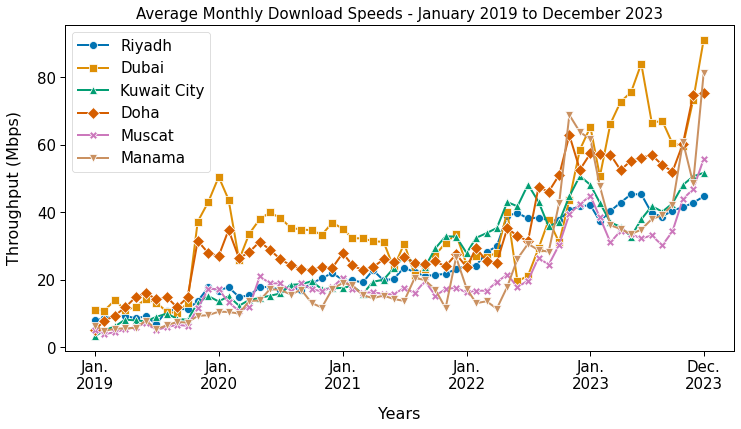

In [199]:
# Create a list of cities, corresponding DataFrame names, line styles, and markers
cities = ['Riyadh', 'Dubai', 'Kuwait', 'Doha', 'Muscat', 'Manama']
dfs = [riyadh_downloads, dubai_downloads, kuwaitcity_downloads, doha_downloads, muscat_downloads, manama_downloads]
#line_styles = ['-', '--', '-.', ':', '-.', '--']
markers = ['o', 's', '^', 'D', 'X', 'v']

# Create a color palette to distinguish between cities
palette = sb.color_palette("colorblind", len(cities))

# Plot data for each city with different line styles and markers
plt.figure(figsize=(12, 6))
for i, (city, df, marker) in enumerate(zip(cities, dfs, markers)):
    sb.lineplot(data=df, x=df.index, y='Throughput_' + city,
                 marker=marker, label=city, color=palette[i])
custom_ticks = ['2019-01-31', '2020-01-31', '2021-01-31', '2022-01-31', 
                '2023-01-31', '2023-12-31']
custom_labels = ['Jan.\n2019', 'Jan.\n2020', 'Jan.\n2021', 'Jan.\n2022', 
                 'Jan.\n2023', 'Dec.\n2023']
plt.title('Average Monthly Download Speeds - January 2019 to December 2023', 
          fontsize = 15)
plt.xlabel('Years', fontsize = 16, labelpad = 15)
plt.xticks(ticks=custom_ticks, labels=custom_labels, fontsize = 15)
plt.ylabel('Throughput (Mbps)', fontsize = 16, labelpad = 15)
plt.yticks(fontsize=15)
plt.legend(labels=['Riyadh','Dubai', 'Kuwait City', 'Doha', 'Muscat', 'Manama'],
           prop={'size': 15})
plt.savefig('figures/five_years_download_thru.pdf', bbox_inches='tight')

### Plot - All Cities by Year

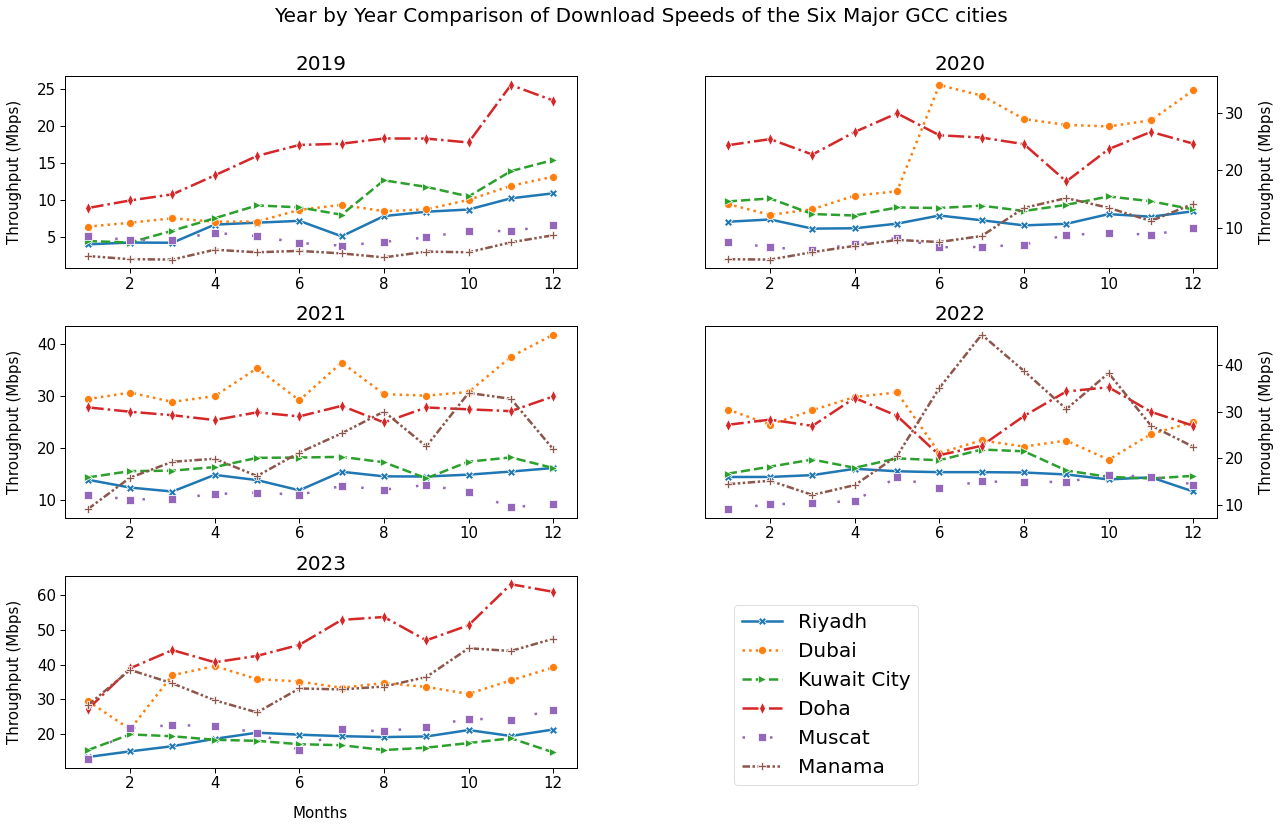

In [160]:
fig, ax = plt.subplots(3,2, figsize = (20,12))
fig.suptitle('Year by Year Comparison of Download Speeds of the Six Major GCC cities\n\n', fontsize = 20)

cities = {'Riyadh': Riyadh_dict, 'Dubai': Dubai_dict, 'Kuwait': Kuwait_dict, 
          'Doha': Doha_dict, 'Muscat': Muscat_dict, 'Manama': Manama_dict}
styles = {'Riyadh': {"linestyle": "solid", "marker": 'X'}, 
          'Dubai': {"linestyle": "dotted", "marker": 'o'},
          'Kuwait': {"linestyle": "dashed", "marker": '>'}, 
          'Doha': {"linestyle": "dashdot", "marker": 'd'}, 
          'Muscat': {"linestyle": (0, (1, 10)), "marker": 's'}, 
          'Manama': {"linestyle": (0, (3, 1, 1, 1, 1, 1)), "marker": 'P'}}
years = [2019, 2020, 2021, 2022, 2023]

for i, year in enumerate(years):
    for city, df in cities.items():
        sb.lineplot(x='month', 
                    y=f'Throughput_{city}',
                    data=df[year], 
                    markers=True, 
                    linestyle = styles[city]['linestyle'], 
                    linewidth = 2.5, 
                    marker = styles[city]['marker'], 
                    legend=False, 
                    ax = ax[i//2, i%2])
    ax[i//2, i%2].set_title(str(year), fontdict={'fontsize': 20})
    ax[i//2, i%2].set_xlabel('')
    ax[i//2, i%2].set_ylabel('Throughput (Mbps)', fontdict={'fontsize': 15}, labelpad = 15)
    ax[i//2, i%2].tick_params(axis = 'both', which = 'major', labelsize = 15)
    
    if (i%2 != 0):
        ax[i//2, i%2].yaxis.tick_right()
        ax[i//2, i%2].yaxis.set_label_position('right')

ax[2,0].set_xlabel('Months', fontdict={'fontsize': 15}, labelpad = 15)
ax[2,1].set_xlabel('Months', fontdict={'fontsize': 15}, labelpad = 15)
fig.legend(labels=['Riyadh','Dubai', 'Kuwait City', 'Doha', 'Muscat', 'Manama'], 
               prop={'size': 20}, bbox_to_anchor=(0.7, 0.3))
ax[2,1].axis('off')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.3)

plt.savefig('figures/all_download_thru.pdf', bbox_inches='tight')

### Preparing Data to plot all Cities together - Uploads

In [157]:
# Renaming Throughput Column in kuwait_uploads for ease of processing later
kuwaitcity_uploads = kuwaitcity_uploads.rename(columns = {'Throughput_Kuwaitcity':'Throughput_Kuwait'})

#Creating dictionaries from the dataframes based on years
Riyadh_dict = dict(tuple(riyadh_uploads.groupby('year')))
Dubai_dict = dict(tuple(dubai_uploads.groupby('year')))
Kuwait_dict = dict(tuple(kuwaitcity_uploads.groupby('year')))
Doha_dict = dict(tuple(doha_uploads.groupby('year')))
Muscat_dict = dict(tuple(muscat_uploads.groupby('year')))
Manama_dict = dict(tuple(manama_uploads.groupby('year')))

### Plot - All Cities by the Period

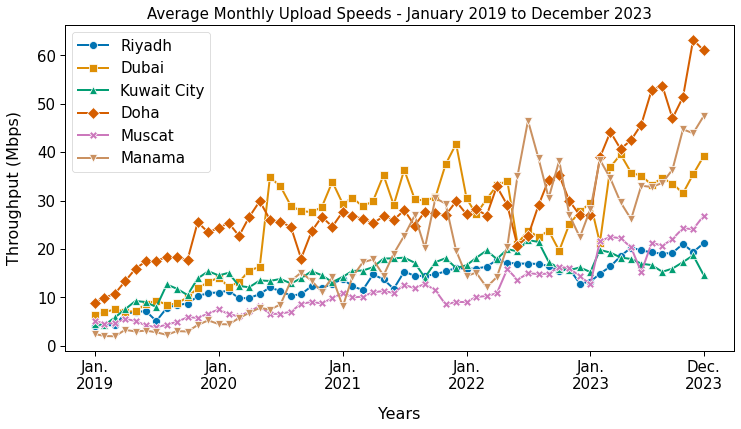

In [200]:
# Create a list of cities, corresponding DataFrame names, line styles, and markers
cities = ['Riyadh', 'Dubai', 'Kuwait', 'Doha', 'Muscat', 'Manama']
dfs = [riyadh_uploads, dubai_uploads, kuwaitcity_uploads, doha_uploads, 
       muscat_uploads, manama_uploads]
#line_styles = ['-', '--', '-.', ':', '-.', '--']
markers = ['o', 's', '^', 'D', 'X', 'v']

# Create a color palette to distinguish between cities
palette = sb.color_palette("colorblind", len(cities))

# Plot data for each city with different line styles and markers
plt.figure(figsize=(12, 6))
for i, (city, df, marker) in enumerate(zip(cities, dfs, markers)):
    sb.lineplot(data=df, x=df.index, y='Throughput_' + city,
                 marker=marker, label=city, color=palette[i])
custom_ticks = ['2019-01-31', '2020-01-31', '2021-01-31', '2022-01-31', 
                '2023-01-31', '2023-12-31']
custom_labels = ['Jan.\n2019', 'Jan.\n2020', 'Jan.\n2021', 'Jan.\n2022', 
                 'Jan.\n2023', 'Dec.\n2023']
plt.title('Average Monthly Upload Speeds - January 2019 to December 2023', 
          fontsize = 15)
plt.xlabel('Years', fontsize = 16, labelpad = 15)
plt.xticks(ticks=custom_ticks, labels=custom_labels, fontsize = 15)
plt.ylabel('Throughput (Mbps)', fontsize = 16, labelpad = 15)
plt.yticks(fontsize=15)
plt.legend(labels=['Riyadh','Dubai', 'Kuwait City', 'Doha', 'Muscat', 'Manama'],
           prop={'size': 15})
plt.savefig('figures/five_years_upload_thru.pdf', bbox_inches='tight')

### Plot - All Cities by Year

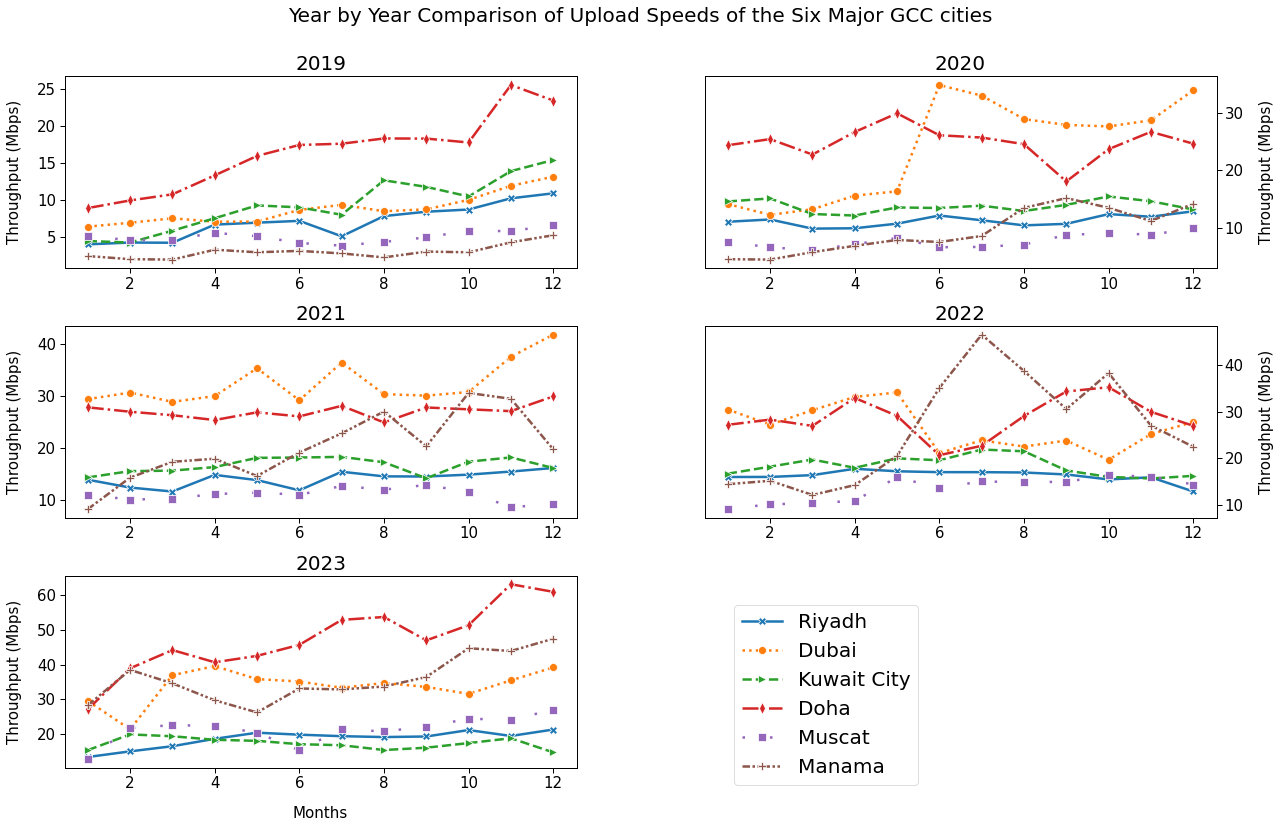

In [159]:
fig, ax = plt.subplots(3,2, figsize = (20,12))
fig.suptitle('Year by Year Comparison of Upload Speeds of the Six Major GCC cities\n\n', fontsize = 20)

cities = {'Riyadh': Riyadh_dict, 'Dubai': Dubai_dict, 'Kuwait': Kuwait_dict, 
          'Doha': Doha_dict, 'Muscat': Muscat_dict, 'Manama': Manama_dict}
styles = {'Riyadh': {"linestyle": "solid", "marker": 'X'}, 
          'Dubai': {"linestyle": "dotted", "marker": 'o'},
          'Kuwait': {"linestyle": "dashed", "marker": '>'}, 
          'Doha': {"linestyle": "dashdot", "marker": 'd'}, 
          'Muscat': {"linestyle": (0, (1, 10)), "marker": 's'}, 
          'Manama': {"linestyle": (0, (3, 1, 1, 1, 1, 1)), "marker": 'P'}}
years = [2019, 2020, 2021, 2022, 2023]

for i, year in enumerate(years):
    for city, df in cities.items():
        sb.lineplot(x='month', 
                    y=f'Throughput_{city}',
                    data=df[year], 
                    markers=True, 
                    linestyle = styles[city]['linestyle'], 
                    linewidth = 2.5, 
                    marker = styles[city]['marker'], 
                    legend=False, 
                    ax = ax[i//2, i%2])
    ax[i//2, i%2].set_title(str(year), fontdict={'fontsize': 20})
    ax[i//2, i%2].set_xlabel('')
    ax[i//2, i%2].set_ylabel('Throughput (Mbps)', fontdict={'fontsize': 15}, labelpad = 15)
    ax[i//2, i%2].tick_params(axis = 'both', which = 'major', labelsize = 15)
    
    if (i%2 != 0):
        ax[i//2, i%2].yaxis.tick_right()
        ax[i//2, i%2].yaxis.set_label_position('right')

ax[2,0].set_xlabel('Months', fontdict={'fontsize': 15}, labelpad = 15)
ax[2,1].set_xlabel('Months', fontdict={'fontsize': 15}, labelpad = 15)
fig.legend(labels=['Riyadh','Dubai', 'Kuwait City', 'Doha', 'Muscat', 'Manama'], 
               prop={'size': 20}, bbox_to_anchor=(0.7, 0.3))
ax[2,1].axis('off')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.3)

plt.savefig('figures/all_upload_thru.pdf', bbox_inches='tight')